/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/pytho

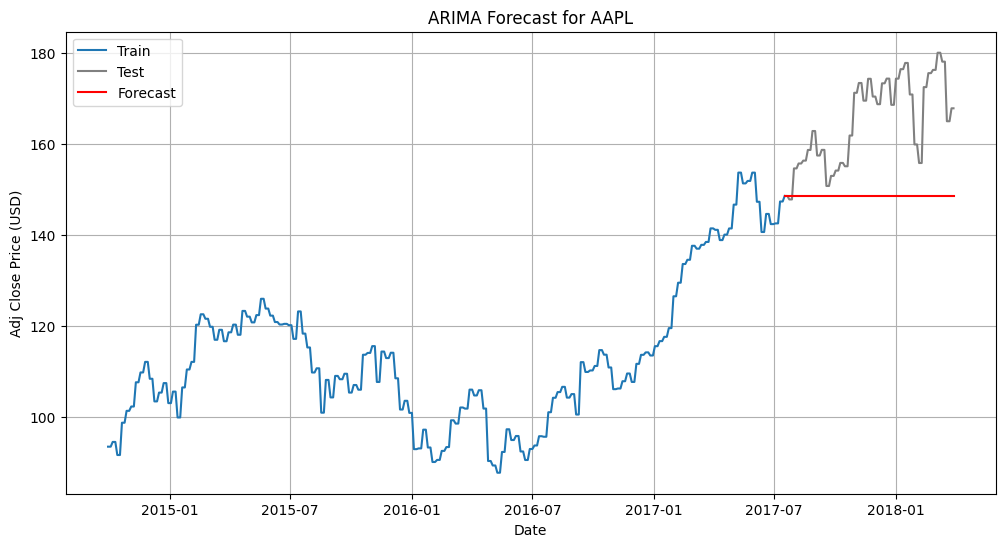

MAPE: 9.73%


In [ ]:
# 04_forecasting_models.ipynb

import sys, os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Ensure Scripts is in the path
module_path = os.path.abspath(os.path.join('..', 'Scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data_loader import load_stock_data
from analysis_utils import add_returns
from technical_indicators import moving_average



symbol = "AAPL"
df = load_stock_data(symbol, data_dir="../Data")

price_series = df['Adj Close'].asfreq('B').ffill()  # Ensure business daily frequency

train_size = int(len(price_series) * 0.8)
train, test = price_series.iloc[:train_size], price_series.iloc[train_size:]

from pmdarima import auto_arima

model = auto_arima(train, start_p=1, start_q=1,
                   max_p=5, max_q=5, seasonal=False, stepwise=True)

forecast_period = len(test)
forecast = model.predict(n_periods=forecast_period)
test_index = test.index

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='gray')
plt.plot(test_index, forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast for AAPL")
plt.xlabel("Date")
plt.ylabel("Adj Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Calculate error metrics
mape = (abs((test - forecast) / test)).mean() * 100
print(f"MAPE: {mape:.2f}%")
